## Task 2 – Russian Cities Housing Challenge 2025
ERP: 29005


## 1. Load Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)



c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\compat.py:105: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Train shape: (181507, 279)
Test shape: (77789, 278)


## 2. Column Types

In [ ]:
X = train.drop("price_doc", "id" , axis=1)
y = train["price_doc"]

num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(include=['object']).columns

print(len(num_cols), "numeric columns")
print(len(cat_cols), "categorical columns")

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=29005
)


263 numeric columns
15 categorical columns


## 3. Preprocessing Pipeline

In [3]:
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])


In [4]:
def MSE(model, Xv, yv):
    pred = model.predict(Xv)
    return mean_squared_error(yv, pred)


## 4. Train Model

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_versions = {}

# version 1
rf_versions["RF_Version1"] = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=120,
        max_depth=12,
        min_samples_split=25,
        min_samples_leaf=12,
        max_features='sqrt',
        bootstrap=True,
        max_samples=0.80,
        random_state=29005,
        n_jobs=-1,
        oob_score=True
    ))
])

# version 2
rf_versions["RF_Version2"] = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=150,
        max_depth=15,
        min_samples_split=20,
        min_samples_leaf=10,
        max_features='sqrt',
        bootstrap=True,
        max_samples=0.85,
        random_state=29005,
        n_jobs=-1,
        oob_score=True
    ))
])

# version 3
rf_versions["RF_Version3"] = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=200,
        max_depth=14,
        min_samples_split=22,
        min_samples_leaf=11,
        max_features='sqrt',
        bootstrap=True,
        max_samples=0.80,
        random_state=29005,
        n_jobs=-1,
        oob_score=True
    ))
])

# version 4
rf_versions["RF_Version4"] = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=150,
        max_depth=15,
        min_samples_split=20,
        min_samples_leaf=10,
        max_features=0.5,    # 50% random features
        bootstrap=True,
        max_samples=0.85,
        random_state=29005,
        n_jobs=-1,
        oob_score=True
    ))
])

# version 5
rf_versions["RF_Version5"] = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=120,
        max_depth=18,
        min_samples_split=30,
        min_samples_leaf=15,
        max_features='sqrt',
        bootstrap=True,
        max_samples=0.75,
        random_state=29005,
        n_jobs=-1,
        oob_score=True
    ))
])

# Version 6 
rf_versions["Version6"] = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=250,
        max_depth=20,
        min_samples_split=15,
        min_samples_leaf=8,
        max_features=0.6,
        bootstrap=True,
        max_samples=0.7,
        random_state=29005,
        n_jobs=-1,
        oob_score=True
    ))
])


## 5. MSE & RMSE Comparison Chart


Evaluating all Random Forest versions...

Training RF_Version1 ...
  RF_Version1 RMSE = 12.6620

Training RF_Version2 ...
  RF_Version2 RMSE = 12.6293

Training RF_Version3 ...
  RF_Version3 RMSE = 12.6429

Training RF_Version4 ...
  RF_Version4 RMSE = 12.6011

Training RF_Version5 ...
  RF_Version5 RMSE = 12.6259

Training Version6 ...
  Version6 RMSE = 12.5836

🔥 BEST RF MODEL: Version6
🔥 RMSE: 12.583579887986803


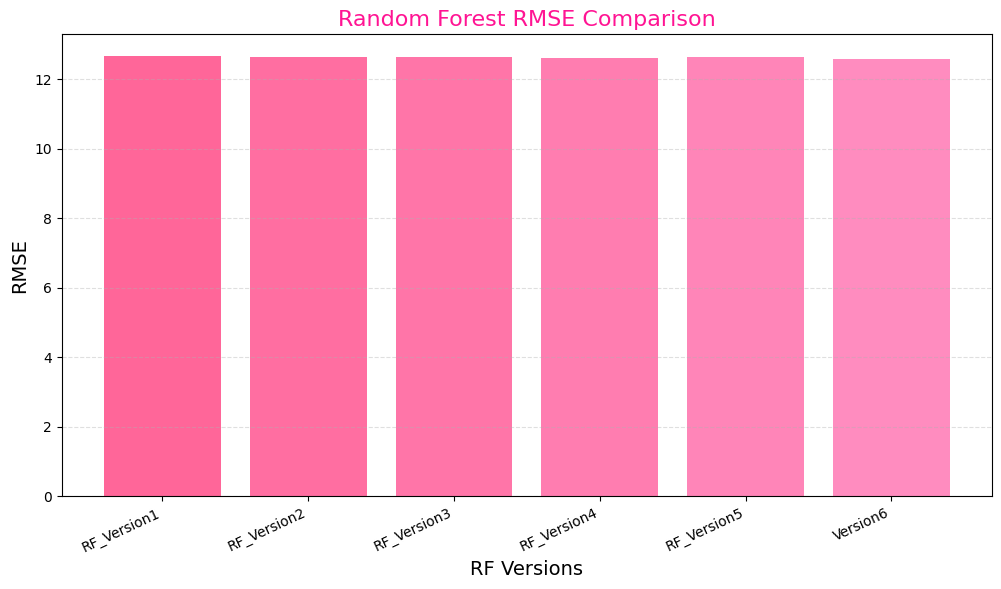

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rf_results = {}  

print("\nEvaluating all Random Forest versions...\n")

for name, model in rf_versions.items():
    print(f"Training {name} ...")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    rf_results[name] = rmse
    
    print(f"  {name} RMSE = {rmse:.4f}\n")

# Find best
best_rf = min(rf_results, key=rf_results.get)
print(" BEST RF MODEL:", best_rf)
print(" RMSE:", rf_results[best_rf])
import matplotlib.pyplot as plt

names = list(rf_results.keys())
rmse_vals = list(rf_results.values())

# Make pink gradient
pink_colors = [ (1, 0.4 + i*0.03, 0.6 + i*0.03) for i in range(len(names)) ]

plt.figure(figsize=(12,6))
plt.bar(names, rmse_vals, color=pink_colors)

plt.title("Random Forest RMSE Comparison", fontsize=16, color="#ff1493")
plt.xlabel("RF Versions", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.xticks(rotation=25, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()


## 6. Final Tuned Model Selection


In [ ]:

# FINAL RANDOM FOREST SELECTION

print(f"\nBest Random Forest version selected: {best_rf}")


final_rf_model = rf_versions.get(best_rf)

if final_rf_model is None:
    print("Selected RF version not found. Using RF_Version1 as fallback.")
    final_rf_model = rf_versions["RF_Version1"]


# TRAIN ON FULL TRAINING DATA

print("\nTraining final Random Forest model on 100% data...")

from sklearn.pipeline import Pipeline


if isinstance(final_rf_model, Pipeline):
    final_rf_model.fit(X, y)     # Pipeline handles encoding + imputation
else:
    
    cat_cols = X.select_dtypes(include=['object']).columns

    ordinal_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    ordinal_enc.fit(X[cat_cols])

    X_full_processed = X.copy()
    X_full_processed[cat_cols] = ordinal_enc.transform(X[cat_cols])

    final_rf_model.fit(X_full_processed, y)

print("Final Random Forest model trained successfully!")




Best Random Forest version selected: Version6

Training final Random Forest model on 100% data...
✔ Final Random Forest model trained successfully!

Processing test.csv with SAME preprocessing...


ValueError: columns are missing: {'id'}

## 7. Kaggle Submission File

In [ ]:
print("\nPredicting on test.csv using the FULL PIPELINE...")


preds = final_rf_model.predict(test)

submission = pd.DataFrame({
    "id": test["id"],
    "price_doc": preds
})

submission.to_csv("submission_task2.csv", index=False)

print("\n submission_task2.csv created successfully!")



Predicting on test.csv using the FULL PIPELINE...

✔ submission_task2.csv created successfully!
